### Задание 1.
#### Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'
plt.style.use('bmh')

In [2]:
# определяем x, y и n 
zp = x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
n = len(zp)

Вычисляем коэффициент регрессии $a$ и $b$ по формулам:

$$b = \frac{\bar{yx}-\bar{y}*\bar{x}}{\bar{x^2}-\bar{(x)}^2}$$

$$a = \bar{y} - b*\bar{x}$$

In [5]:
b = (np.mean(x*y)-np.mean(x)*np.mean(y))/(np.mean(x**2)-np.mean(x)**2)
a = np.mean(y)-b*np.mean(x)
print(f'a = {np.round(a, 4)}\nb = {np.round(b, 4)}')

a = 444.1774
b = 2.6205


Уравнение регрессии с intersept имеет вид:

$$y = 444.1774 + 2.6205 * x$$

Находим коэффициент корреляции по формуле:

$$r_{xy} = \frac{\sum_{i=0}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sqrt{\sum_{i=0}^{n}(x_{i}-\bar{x})^2\sum_{i = 0}^{n}(y_{i}-\bar{y})^2}} = b * \frac{\sigma_{x}}{\sigma{y}}$$

In [4]:
r = b * np.std(x) / np.std(y)
np.round(r, 4)

0.8875

Видно, что $r \to 1$ и $r > 0.5 $ 

Получим коэффициент детерминации по формуле:

$$R^2 = r_{xy}^2$$

In [7]:
R2 = r**2
np.round(R2, 4)

0.7876

Из $R^2$ видно, что 78.8% вариации поведенческого кредитного скоринга $(y)$ объясняется вариацией величины заработной платы заемщиков банка $(x)$, а это значит, что остальные 21.2% вариации скоринга зависят от чего-то другого и для их анализа нам надо брать не величину зарплаты, а другие показатели

Знаем $a$, $b$ и зарплаты $x$ - можем по формуле $y = a + bx$ вывести предсказание скоринга

In [8]:
y_pred = a+b*x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

По предсказанным ценам найдём ошибку аппроксимации по формуле:

$$\bar{A} = \frac{1}{n}\sum_{i=0}^{n}\mid{\frac{y_{i}-\hat{y_{i}}}{y_{i}}}\mid*100\%$$

In [9]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
print(f'A_mean = {int(np.round(A_mean))}%')

A_mean = 11%


$\bar{A} > 10\% \Rightarrow$ Теоретические значения не близки к тем, которые выдает модель линейной регрессии, что может говорить о "не очень красивой" модели. Однако линейную регрессию по ней мы все равно будем отрабатывать до конца, так как $r \not= 0$ и $r \to 1$ 

Оценим значимость уравнения регрессии с помощью F-критерия Фишера. Сначала найдём расчётное значение по формуле:

$$F_{факт} = \frac{r_{xy}^2 * (n - 2)}{(1 - r_{xy}^2)}$$

In [10]:
F_fact = (r**2 * (n - 2)) / (1 - r**2)
np.round(F_fact, 4)

29.6716

Для поиска табличного $F_{кр}$ при 5% уровне значимости и степенях свободы:

$k_{1} = 1$ (так как у нас парная линейная регрессия)

$k_{2} = n - k_{1} - 1 = 10 - 2 = 8$

$F_{кр} = 5.32$

Сравним:

$F_{факт} = 29.67 > F_{кр} = 5.32 \Rightarrow$ уравнение регрессии статистически значимо.

Оценим статистическую значимость самих параметров регресии $a$ и $b$ при помощи t-статистики Стьюдента
Для находжения расчётных $t_{a}$ и $t_{b}$ нужно найти случайные ошибки $m_{a}$ и $m_{b}$, для поиска которых, нужно определить стандартную ошибку $S_{ост}$

$$S_{ост} = \sqrt{\frac{\sum_{i=0}^{n}(y_{i} - \hat{y_{i})^2}}{n-2}}$$

In [11]:
s_residual = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))
print(f's_residual = {np.round(s_residual, 4)}')

s_residual = 89.9334


$$m_{a} = S_{ост} * \frac{\sqrt{\sum x^2}}{n * \sigma_{x}}$$

$$m_{b} = \frac{S_{ост}}{\sigma_{x} * \sqrt{n}}$$

In [13]:
m_a = s_residual * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = s_residual / (np.std(x) * np.sqrt(n))
print(f'm_a = {np.round(m_a, 4)}\nm_b = {np.round(m_b, 4)}')

m_a = 56.4665
m_b = 0.4811


Тогда $t_{a}$ и $t_{b}$:

$$t_{a} = \frac{a}{m_{a}}$$

$$t_{b} = \frac{b}{m_{b}}$$

In [14]:
t_a = a / m_a
t_b = b / m_b
print(f't_a = {np.round(t_a, 4)}\nt_b = {np.round(t_b, 4)}')

t_a = 7.8662
t_b = 5.4472


Для поиска табличного $t_{кр}$ находим число степеней свободы $df$:

$df = n - m - 1 = 10 - 2 = 8$ (m - число признаков)

Определяем уровень свободы $\alpha$ в 5%:

$\alpha = 0.05$

$t_{кр} = 2.31$

Сравним:

$t_{a} = 7.87 > t_{кр} = 2.31$

$t_{b} = 5.45 > t_{кр} = 2.31$

$\Rightarrow$ параметры $a$ и $b$ статистически значимы

Для нахождения доверительных интервалов для параметров $a$ и $b$ нужно определить предельную ошибку для каждого показателя $\Delta$ по формулам:

$$\Delta_{a} = t_{кр} * m_{a}$$

$$\Delta_{b} = t_{кр} * m_{b}$$

In [16]:
t_cr = 2.31
delta_a = t_cr * m_a
delta_b = t_cr * m_b
print(f'delta_a = {np.round(delta_a, 4)}\ndelta_b = {np.round(delta_b, 4)}')

delta_a = 130.4376
delta_b = 1.1113


Тогда доверительные интервалы:


$$\gamma_{a} = a \pm \Delta_{a}$$

$$\gamma_{b} = b \pm \Delta_{b}$$

In [23]:
gamma_a_min = a - delta_a
gamma_a_max = a + delta_a
gamma_b_min = b - delta_b
gamma_b_max = b + delta_b
print(f'gamma_a [{gamma_a_min}; {gamma_a_max}]\ngamma_b [{gamma_b_min}; {gamma_b_max}]')

gamma_a [313.7397479822853; 574.6149666664339]
gamma_b [1.5092376243700454; 3.7318401404354846]


Вывод: с вероятностью в 95% пареметры $a$ и $b$, находясь в указанных границах, являются статистически значимыми и отличны от нуля

In [18]:
df = pd.DataFrame({'x': x, 'y': y, 'y_pred': y_pred}, columns=['x', 'y', 'y_pred'])
df = df.sort_values('x')
df.head(3)

,x,y,y_pred
0,35,401,535.896218
4,40,459,548.998913
1,45,574,562.101607


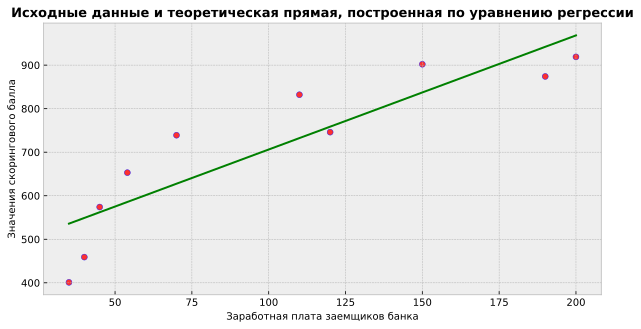

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], edgecolors='b', alpha=0.8, c='red')
plt.plot(df['x'], df['y_pred'], color='green')
plt.xlabel('Заработная плата заемщиков банка', fontsize=10)
plt.ylabel('Значения скорингового балла', fontsize=10)
plt.title(f'Исходные данные и теоретическая прямая, построенная по уравнению регрессии', fontsize=13, fontweight='bold');

In [22]:
X = x.reshape(n, 1)
y = y.reshape(n, 1)
w = (np.linalg.inv(X.T @ X) @ X.T @ y)
print(f'вес b без intersept = {np.round(w[0][0], 4)}')

вес b без intersept = 5.8898


$\Rightarrow$ Уравнение регрессии с intersept имеет вид:

$$y = 5.8898 * x$$

In [24]:
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [25]:
y_pred = X @ w
y_pred

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

### Задание 2.
#### В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?

Если до нас не было анализа генеральной совокупности - критерием оценки будет критерий $t$ Стьюдента из таблицы Стьюдента

Если до нас был анализ генеральной совокупности - критерием оценки будет критерий Фишера $Z$ из таблицы распределения Лапласа для $Z < 0 $ при работе с доверительным интервалом и для $Z > 0 $ при проверке гипотез